In [1]:
#pip install control #Instalação da lib CONTROL (necessário executar só uma vez em ambientes novos)

In [2]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

# Funções de Transferência

In [3]:
Tsim = 200 #tempo simulação
s = ctl.TransferFunction.s

#### Planta

In [4]:
R = 1
C = 5e-3
L = 1

#Tensão no capacitor
P_s = 1/(L*C*s**2+R*C*s+1)
display(P_s)

TransferFunction(array([1]), array([0.005, 0.005, 1.   ]))

#### Controlador PID

In [5]:
Kp = 4
Ki = 7.5
Kd = Ki/5

C_s = (Kd*s**2 + Kp*s + Ki) / s
display(C_s)

TransferFunction(array([1.5, 4. , 7.5]), array([1, 0]))

#### Sensor

In [6]:
H_s = 1/1
display(H_s)

1.0

# Malha Fechada

In [7]:
Parte_superior = ctl.series(C_s, P_s) #Controlador * Planta

G1_s = ctl.feedback(Parte_superior, H_s, sign = -1) # Adiciona sensor (feedback)
display(G1_s)

TransferFunction(array([1.5, 4. , 7.5]), array([5.000e-03, 1.505e+00, 5.000e+00, 7.500e+00]))

# Resposta ao degrau

#### Função degrau unitário

In [8]:
T = np.linspace(-1, Tsim, 100000) 

degrau = np.ones_like(T)
degrau[T<0] = 0
degrau[T>10] = 4.5
degrau[T>20] = 2

#### Respostas ao degrau

In [9]:
T, yout = ctl.forced_response(P_s, T, degrau) #step_response(P_s, T, input = degrau)
T, you_mf = ctl.forced_response(G1_s, T, degrau) #step_response(G1_s, T, input = )

#### Plot resultados

Text(0.5, 1.0, 'Sistema de 2ª ordem')

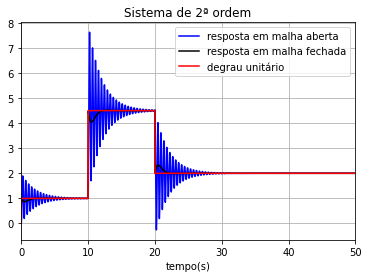

In [10]:
plt.plot(T, yout, 'b-')
plt.plot(T, you_mf, 'k-')
plt.plot(T, degrau, 'r-')
plt.xlabel('tempo(s)')
plt.legend([ 'resposta em malha aberta','resposta em malha fechada', 'degrau unitário',])
plt.grid()
plt.xlim(-0.1,50)
plt.title('Sistema de 2ª ordem')

Text(0.5, 1.0, 'Sistema de 2ª ordem')

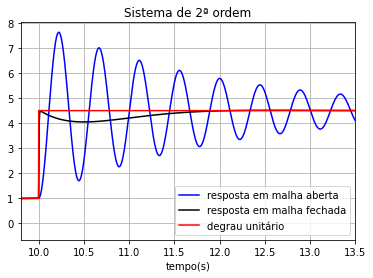

In [11]:
plt.plot(T, yout, 'b-')
plt.plot(T, you_mf, 'k-')
plt.plot(T, degrau, 'r-')
plt.xlabel('tempo(s)')
plt.legend([ 'resposta em malha aberta','resposta em malha fechada', 'degrau unitário',])
plt.grid()
plt.xlim(9.8,13.5)
plt.title('Sistema de 2ª ordem')